## Requirements

In [1]:
!pip install gensim==4.3.2


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Core Libraries & Packages

In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import gensim
import sklearn
import plotly
import pickle

# Natural Language Processing
import nltk
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer

# Machine Learning and Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score, silhouette_samples

# Visualization
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Miscellaneous
from ast import literal_eval
from scipy.spatial import distance

# Ensure gensim version is 4.3.2 and install openpyxl
!pip install gensim==4.3.2
!pip install openpyxl



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## VAD Analysis

In [3]:
vad = pd.read_excel('/work/GitHub_ML_Deepnote/Machine Learning/4. VAD/vad.xlsx', index_col=0, engine='openpyxl')

In [4]:
# Specify the path to the pickle file
pickle_file_path = '/work/GitHub_ML_Deepnote/Machine Learning/3. Word2vec /corpus_words.pkl'

# Load the pickled object
with open(pickle_file_path, 'rb') as file:
    corpus_words = pickle.load(file)

# Flatten the list of lemmas
corpus_flat_lemmas = [lemma for sublist in corpus_words for lemma in sublist]

In [16]:
len(corpus_words)

85382

In [6]:
corpus_words = []
corpus_emo = []
corpus_noVAD = [] 
#another way we can overview what words haven't been matched with a VAD score

for i in corpus_flat_lemmas:
    if i in vad.index:
        corpus_emo.append(vad.loc[i])
        corpus_words.append(i)
    else:
        corpus_noVAD.append(i)

In [7]:
corpus_vad = pd.DataFrame(corpus_emo, index = corpus_words)

In [8]:
# Select features for clustering
X = corpus_vad[['valence', 'arousal', 'dominance']].values

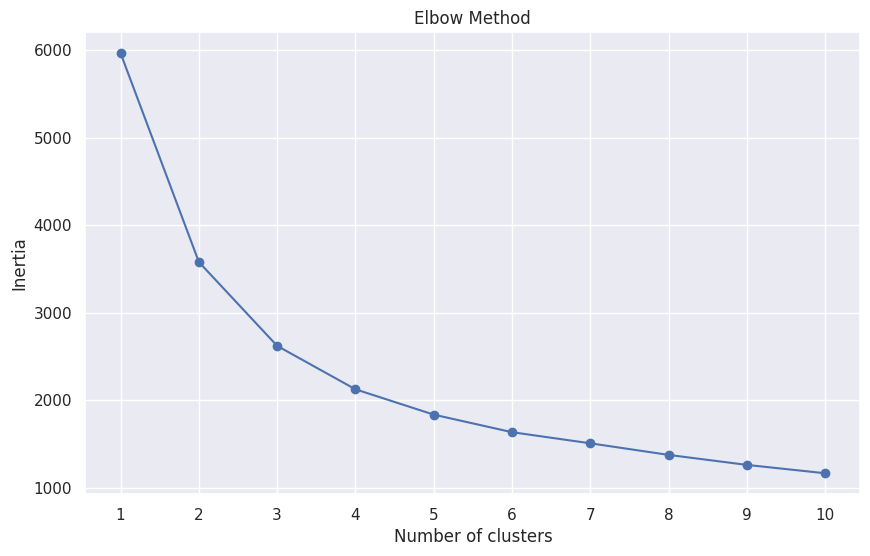

In [9]:
# Elbow method to identify the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


In [10]:
# Based on the elbow method, choose the optimal number of clusters
optimal_clusters = 5  # Replace with the number you determine from the graph

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
corpus_vad['Cluster'] = kmeans.fit_predict(X)

### old visual 

In [11]:
# Sample data
corpus_vad_s = corpus_vad.sample(2000)

fig = px.scatter_3d(corpus_vad_s, x='valence', y='arousal', z='dominance', color='Cluster', hover_data=[corpus_vad_s.index],
                    color_discrete_sequence=['yellow', 'green', 'blue', 'red'])

fig.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Hide the color bar
fig.update_layout(coloraxis_showscale=True)

fig.show()

In [12]:
# Saving the 3D scatter plot as an HTML file
fig.write_html('/work/GitHub_ML_Deepnote/Machine Learning/4. VAD/vad_3d_plot.html')

### New visual w. proper clusters

In [13]:
# Sample data
corpus_vad_s = corpus_vad.sample(2000)

# Convert 'Cluster' column to string
corpus_vad_s['Cluster'] = corpus_vad_s['Cluster'].astype(str)

fig = px.scatter_3d(corpus_vad_s, x='valence', y='arousal', z='dominance', color='Cluster', hover_data=[corpus_vad_s.index],
                    color_discrete_sequence=px.colors.sequential.Rainbow)

fig.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Hide the color bar
fig.update_layout(coloraxis_showscale=False)

# Add legend
fig.update_layout(showlegend=True)

fig.show()

In [17]:
# Sample data
corpus_vad_s = corpus_vad.sample(1000)

# Plot 1: Valence vs Dominance
fig1 = px.scatter(corpus_vad_s, x='valence', y='dominance', color='Cluster', hover_data=[corpus_vad_s.index],
                  color_discrete_sequence=['yellow', 'green', 'blue', 'red'])

fig1.update_traces(marker=dict(size=5, line=dict(width=0)), selector=dict(mode='markers'))

# Plot 2: Arousal vs Valence
fig2 = px.scatter(corpus_vad_s, x='arousal', y='valence', color='Cluster', hover_data=[corpus_vad_s.index],
                  color_discrete_sequence=['yellow', 'green', 'blue', 'red'])

fig2.update_traces(marker=dict(size=5, line=dict(width=0)), selector=dict(mode='markers'))

# Plot 3: Arousal vs Dominance
fig3 = px.scatter(corpus_vad_s, x='arousal', y='dominance', color='Cluster', hover_data=[corpus_vad_s.index],
                  color_discrete_sequence=['yellow', 'green', 'blue', 'red'])

fig3.update_traces(marker=dict(size=5, line=dict(width=0)), selector=dict(mode='markers'))

# Show the plots
fig1.show()
fig2.show()
fig3.show()

In [15]:
# Save the plots as HTML files
fig1.write_html('/work/GitHub_ML_Deepnote/Machine Learning/4. VAD/vad_plot_valence_dominance.html')
fig2.write_html('/work/GitHub_ML_Deepnote/Machine Learning/4. VAD/vad_plot_arousal_valence.html')
fig3.write_html('/work/GitHub_ML_Deepnote/Machine Learning/4. VAD/vad_plot_arousal_dominance.html')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f64215d6-debc-46bd-b273-63565459a66d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>